In [1]:
import healpy as hp
import pylab as mplot
%pylab inline
import astropy.io.fits as pf
import kmeans_radec

Populating the interactive namespace from numpy and matplotlib


In [2]:
def make_jk(ra_ran, dec_ran, ra, dec, N=100, dilute_factor=1, rand_out=1, large_mem=True, maxiter=500, tol=1e-05, seed=100):
    """
    Given coordinate of random points, generate JK indecies 
    for another catalog of positions. Include the possibility 
    of diluting the random catalog. Return an array of JK 
    indicies the same length of ra and dec.  
    """

    RADEC_ran = np.zeros((len(ra_ran),2))
    RADEC_ran[:,0] = ra_ran
    RADEC_ran[:,1] = dec_ran

    RADEC = np.zeros((len(ra),2))
    RADEC[:,0] = ra
    RADEC[:,1] = dec

    np.random.seed(seed)
    ids = np.arange(len(ra_ran))
    np.random.shuffle(ids)
    RADEC_ran_dilute = np.zeros((int(len(ra_ran)/dilute_factor),2))
    RADEC_ran_dilute[:,0] = ra_ran[ids[:int(len(ra_ran)/dilute_factor)]]
    RADEC_ran_dilute[:,1] = dec_ran[ids[:int(len(ra_ran)/dilute_factor)]]

    km = kmeans_radec.kmeans_sample(RADEC_ran_dilute, N, maxiter=500, tol=1e-05)
    print(np.unique(km.labels))

    if large_mem == True:
        Ntotal = len(RADEC)
        Ntotal_ran = len(RADEC_ran)

        JK = np.array([])
        JK_ran = np.array([])

        for i in range(99):
            #print i
            JK = np.concatenate((JK, km.find_nearest(RADEC[i*int(Ntotal/100):(i+1)*int(Ntotal/100)])), axis=0)
            print(np.unique(JK))

            if rand_out==1:
                print(i)
                JK_ran = np.concatenate((JK_ran, km.find_nearest(RADEC_ran[i*int(Ntotal_ran/100):(i+1)*int(Ntotal_ran/100)])), axis=0)

        JK = np.concatenate((JK, km.find_nearest(RADEC[99*int(Ntotal/100):])), axis=0)
        if rand_out==1:
            JK_ran = np.concatenate((JK_ran, km.find_nearest(RADEC_ran[99*int(Ntotal_ran/100):])), axis=0)
        print('len of random', len(ra_ran))
        print('len of JK', len(JK_ran))

    else:
        JK = km.find_nearest(RADEC)
        if rand_out==1:
            JK_ran = km.find_nearest(RADEC_ran)
    
    if rand_out==1:    
        return JK_ran, JK
    else:
        return JK, JK

## JK for Redmapper

In [3]:
RM = pf.open('./Fits_files/RM_cluster.fits')[1].data
cols = pf.open('./Fits_files/RM_cluster.fits')[1].columns

RM_ran = pf.open('./Fits_files/RM_cluster_rand.fits')[1].data
cols_ran = pf.open('./Fits_files/RM_cluster_rand.fits')[1].columns

ra = RM['RA']
dec = RM['dec']
z = RM['z']
lam = RM['lambda']
JK_orig = RM['jk']

ra_ran = RM_ran['RA']
dec_ran = RM_ran['dec']
z_ran = RM_ran['z']
lam_ran = RM_ran['lambda']
w_ran = RM_ran['w']
JK_ran_orig = RM_ran['jk']



In [4]:
# Changed N in make_jk from 30 to 100
ids = np.arange(len(ra))
np.random.shuffle(ids)
N = 10000
JK_ran, JK = make_jk(ra_ran, dec_ran, ra, dec, N=100, dilute_factor=1, rand_out=1, large_mem=True, maxiter=500, tol=1e-05, seed=100)

X (2966, 2)  centers (100, 2)  tol=1e-05  maxiter=500
18 iterations  cluster sizes: [36 29 32 27 55 26 32 28 30 37 45 22 37 32 24 22 27 15 17 25 29 17 29 37
 30 36 36 26 23 32 25 40 40 35 45 28 23 30 30 26 38 28 29 23 34 14 36 36
 34 34 16 32 29 34 33 25 22 30 27 24 34 22 20 31 37 24 28 33 18 31 29 27
 29 21 39 34 18 29 26 33 21 32 26 33 32 53 20 28 32 45 26 34 33 32 29 39
 28 28 17 22]
X (2200708, 2)  centers (100, 2)  tol=1e-05  maxiter=500
132 iterations  cluster sizes: [23143 20455 22855 20916 22696 17019 23825 22423 22362 24182 22758 21103
 22939 25446 22172 21661 20666 21046 19749 20030 24920 21063 22710 21537
 21691 22721 23386 21062 22410 23991 23565 24810 24918 23086 26310 22910
 22706 24753 23491 21233 23215 22805 25556 20862 22232 12576 20531 22305
 24492 22634 19405 25222 19423 21872 23331 21937 20048 20627 24442 18514
 25818 21255 12946 16082 20305 14931 21520 19744 21283 22676 24216 18698
 21336 21237 21510 22221 26116 23095 21679 22607 19282 21475 22157 19502
 24833 2598

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
21
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
22
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 4

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
44
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
45
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 4

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
64
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
65
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 4

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
84
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
85
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 4

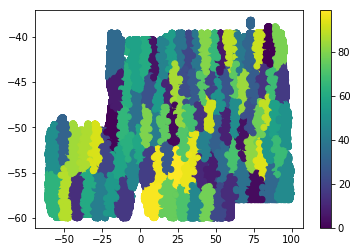

In [5]:
JK_ran_r, JK_r = JK_ran, JK
ra_temp = ra_ran
ra_temp[ra_temp>180] -= 360
mplot.scatter(ra_temp, dec_ran, c=JK_ran)
mplot.colorbar()

1847640
3682


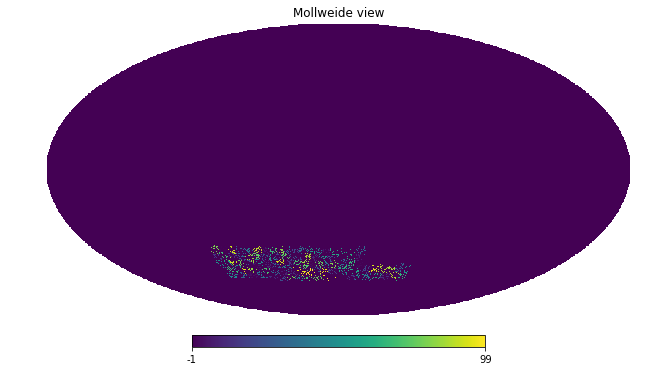

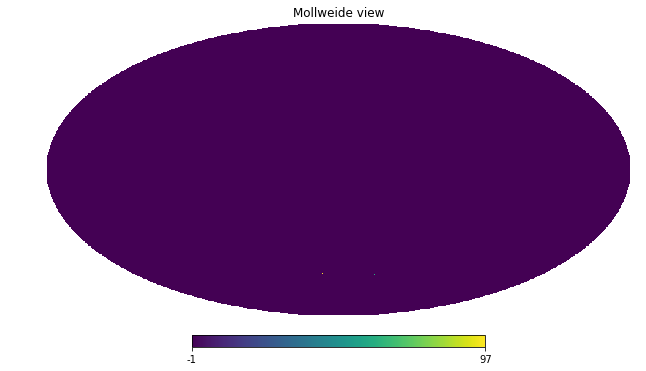

In [6]:
nside = 4096
# build the JK_ran mask
mask = np.zeros(hp.nside2npix(nside))-1
pix_ran = hp.ang2pix(nside, (90.-dec_ran)*np.pi/180 , ra_ran*np.pi/180)
mask[pix_ran] = JK_ran
print(len(np.where(mask != -1)[0]))
hp.mollview(mask)

nside = 4096
# build the JK mask
mask = np.zeros(hp.nside2npix(nside))-1
pix = hp.ang2pix(nside, (90.-dec)*np.pi/180 , ra*np.pi/180)
mask[pix] = JK
print(len(np.where(mask != -1)[0]))
hp.mollview(mask)

In [8]:
print(len(JK))
print(len(JK_ran))
print(len(pix))

3684
2200708
3684


In [104]:
# save random
c1 = pf.Column(name='RA', format='E', array=ra_ran)
c2 = pf.Column(name='DEC', format='E', array=dec_ran)
c3 = pf.Column(name='Z', format='E', array=z_ran)
c4 = pf.Column(name='LAMBDA', format='E', array=lam_ran)
c5 = pf.Column(name='W', format='E', array=w_ran)
c6 = pf.Column(name='JK', format='E', array=JK_ran)

CC = [c1,c2,c3, c4, c5, c6]
hdu = pf.BinTableHDU.from_columns(CC, nrows=len(ra_ran))
hdu.writeto('./Fits_files/RM_random_jk.fits', overwrite=True)

#new = pf.open('./Fits_files/RM_random_jk.fits')[1].data
#print(new['jk'])
#print(len(JK_ran))

In [105]:
# save normal
c7 = pf.Column(name='RA', format='E', array=ra)
c8 = pf.Column(name='DEC', format='E', array=dec)
c9 = pf.Column(name='Z', format='E', array=z)
c10 = pf.Column(name='LAMBDA', format='E', array=lam)
c11 = pf.Column(name='JK', format='E', array=JK)

CC = [c7,c8,c9,c10,c11]
hdu = pf.BinTableHDU.from_columns(CC, nrows=len(ra))
hdu.writeto('./Fits_files/RM_jk.fits', overwrite=True)

#new = pf.open('./Fits_files/RM_jk.fits')[1].data
#print(new['jk'])
#print(len(new['jk']))

## JK for WaZP

In [25]:
W = pf.open('./Fits_files/WaZP_cluster.fits')[1].data
cols_w = pf.open('./Fits_files/WaZP_cluster.fits')[1].columns

W_ran = pf.open('./Fits_files/WaZP_cluster_rand_2.fits')[1].data
cols_ran_w = pf.open('./Fits_files/WaZP_cluster_rand_2.fits')[1].columns

ra_w = W['RA']
dec_w = W['dec']
z_w = W['z']
lam_w = W['lambda']
JK_orig_w = W['jk']

ra_ran_w = W_ran['RA']
dec_ran_w = W_ran['dec']
z_ran_w = W_ran['z']
lam_ran_w = W_ran['lambda']
w_ran_w = W_ran['w']
JK_ran_orig_w = W_ran['jk']

In [26]:
# Changed N in make_jk from 30 to 100
ids_w = np.arange(len(ra_w))
np.random.shuffle(ids_w)
N_w = 10000
JK_ran_w, JK_w = make_jk(ra_ran_w, dec_ran_w, ra_w, dec_w, N=100, dilute_factor=1, rand_out=1, large_mem=True, maxiter=500, tol=1e-05, seed=10)

X (1000, 2)  centers (100, 2)  tol=1e-05  maxiter=500
13 iterations  cluster sizes: [ 9 10  7  7  7 14  7 13 14 12 16 11  6  8 11  8 10 18  5 17  4  7 20  9
  5 10  8  7  8 10  3 15 14  6  3  6  6 13 10  8  8  8  4  5  6  6 13  8
  8  3 10 16 14 11  8 14 18  9 16  9 15  3  7 20 16  6 13  9 14  9 20 12
  9 10  7  3  6 15 12  7 15  7 12 17  6 14 17  8 10 13  8  6  9  8 15  9
 10 11  7  9]
X (141984, 2)  centers (100, 2)  tol=1e-05  maxiter=500
102 iterations  cluster sizes: [1520 1438 1560 1701 1092 1729 1272 1408 1134 1539 1614 1400 1509 1473
 1498 1823 1385 1509 1105 1649 1325 1712 1534 1533 1252 1364 1521 1579
 1280 1366 1679 1482 1294 1135 1635 1322 1347 1085 1306 1353 1124 1260
 1356 1548 1388 1316 1485 1638  893 1133 1398 1609 1489 1243  807 1360
 1475  982 1171 1644 1133 1486 1549 1749 1441 1582 1259 1394 1294 1525
 1727 1476 1438 1321 1576 1332 1302 1373 1631 1386 1113 1564 1579 1565
 1145 1569 1615 1577 1563 1422 1103 1586 1484 1453 1635 1582 1268 1457
 1548 1401]
[ 0  1  2  3  

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
30
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
31
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 4

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
58
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
59
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 4

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
85
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
86
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 4

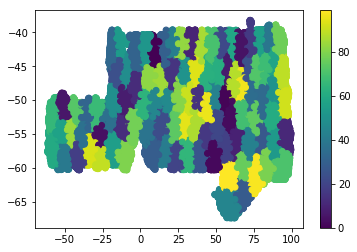

In [27]:
ra_temp_w = ra_ran_w
ra_temp_w[ra_temp_w>180] -= 360
mplot.scatter(ra_temp_w, dec_ran_w, c=JK_ran_w)
mplot.colorbar()

140634
197795


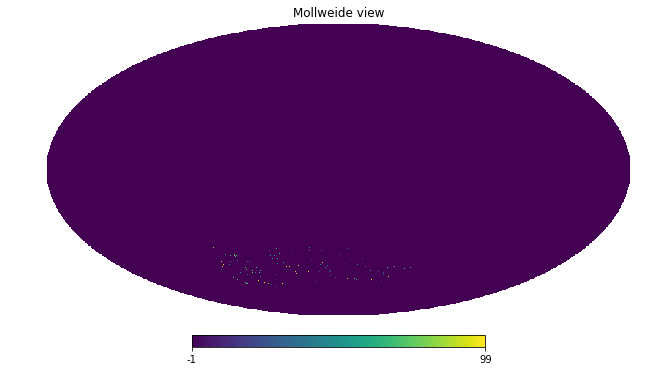

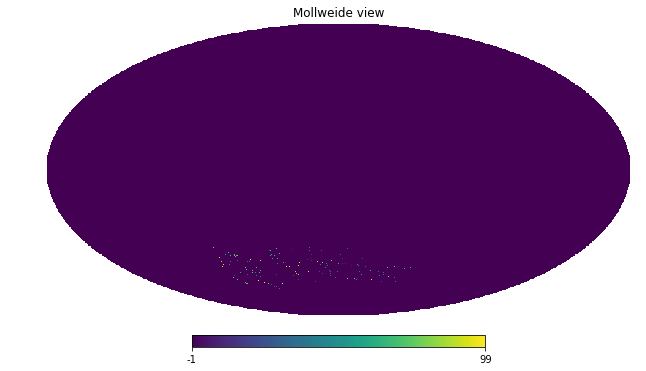

In [30]:
nside = 4096
# build the JK mask
mask = np.zeros(hp.nside2npix(nside))-1
pix_ran_w = hp.ang2pix(nside, (90.-dec_ran_w)*np.pi/180 , ra_ran_w*np.pi/180)
mask[pix_ran_w] = JK_ran_w
print(len(np.where(mask != -1)[0]))
hp.mollview(mask)

pix_w = hp.ang2pix(nside, (90.-dec_w)*np.pi/180 , ra_w*np.pi/180)
mask[pix_w] = JK_w
print(len(np.where(mask != -1)[0]))
hp.mollview(mask)

In [34]:
print(len(JK_w))
print(len(JK_ran_w))
print(len(pix_w))

58590
141984
58590


In [41]:
# save random
c1_w = pf.Column(name='RA', format='E', array=ra_ran_w)
c2_w = pf.Column(name='DEC', format='E', array=dec_ran_w)
c3_w = pf.Column(name='Z', format='E', array=z_ran_w)
c4_w = pf.Column(name='LAMBDA', format='E', array=lam_ran_w)
c5_w = pf.Column(name='W', format='E', array=w_ran_w)
c6_w = pf.Column(name='JK', format='E', array=JK_ran_w)

CC_w = [c1_w,c2_w,c3_w, c4_w, c5_w, c6_w]
hdu = pf.BinTableHDU.from_columns(CC_w, nrows=len(ra_ran_w))
hdu.writeto('./Fits_files/WaZP_random_jk.fits', overwrite=True)

#new = pf.open('./Fits_files/WaZP_random_jk.fits')[1].data
#print(new['jk'])
#print(len(JK_ran_w))

[26. 21. 37. ... 57. 32.  2.]
141984


In [43]:
# save normal
c7_w = pf.Column(name='RA', format='E', array=ra_w)
c8_w = pf.Column(name='DEC', format='E', array=dec_w)
c9_w = pf.Column(name='Z', format='E', array=z_w)
c10_w = pf.Column(name='LAMBDA', format='E', array=lam_w)
c11_w = pf.Column(name='JK', format='E', array=JK_w)

CC_w = [c7_w,c8_w,c9_w,c10_w,c11_w]
hdu = pf.BinTableHDU.from_columns(CC_w, nrows=len(ra_w))
hdu.writeto('./Fits_files/WaZP_jk.fits', overwrite=True)

#new = pf.open('./Fits_files/WaZP_jk.fits')[1].data
#print(new['jk'])
#print(len(new['jk']))

[81. 99. 49. ... 15. 93. 24.]
58590


In [7]:
new = pf.open('./Fits_files/WaZP_random_jk.fits')[1].data
print(new)
print(new['lambda'])

[( 43.767525, -58.76188 , 1., 1., 1., 26.)
 ( 49.216812, -53.150257, 1., 1., 1., 21.)
 (-39.131775, -53.867428, 1., 1., 1., 37.) ...
 (-51.256042, -53.330948, 1., 1., 1., 57.)
 (-34.662506, -54.153362, 1., 1., 1., 32.)
 ( 47.40012 , -56.41925 , 1., 1., 1.,  2.)]
[1. 1. 1. ... 1. 1. 1.]
